In [1]:
import numpy as np
import matplotlib.pyplot as plt

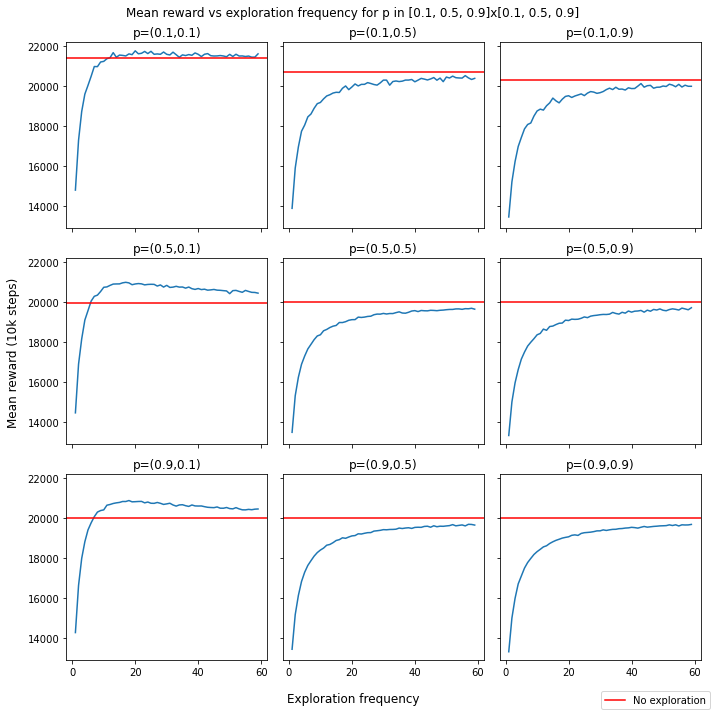

In [23]:
ps = [0.1, 0.5, 0.9]
min_freq = 1
max_freq = 60
step = 1

fig, axs = plt.subplots(len(ps), len(ps), sharex=True, sharey=True, figsize=(10,10))

for i, p1 in enumerate(ps):
    for j, p2 in enumerate(ps):
        file_name = f"data/total_rewards/explore_rewards_{min_freq}to{max_freq}_{p1}x{p2}.npy"
        explore_freqs = list(range(min_freq, max_freq, step)) + [100000000]

        explore_rewards = np.load(file_name)

        means = explore_rewards.mean(axis=1)
        stds = explore_rewards.std(axis=1)

        axs[i,j].plot(explore_freqs[:-1], means[:-1])
        axs[i,j].axhline(y = means[-1], color='r', linestyle='-', label="No exploration")
        axs[i,j].set_title(f"p=({p1},{p2})")
        
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.supxlabel('Exploration frequency')
fig.supylabel('Mean reward (10k steps)')
plt.suptitle(f"Mean reward vs exploration frequency for p in [{', '.join([str(p) for p in ps])}]x[{', '.join([str(p) for p in ps])}]")
plt.tight_layout()

save_name = f"plots/subplots({','.join([str(p) for p in ps])}).png"
plt.savefig(save_name)